# Practice notebook for univariate analysis using NHANES data

This notebook will give you the opportunity to perform some univariate analyses on your own using the NHANES.  These analyses are similar to what was done in the week 2 NHANES case study notebook.

You can enter your code into the cells that say "enter your code here", and you can type responses to the questions into the cells that say "Type Markdown and Latex".

Note that most of the code that you will need to write below is very similar to code that appears in the case study notebook.  You will need to edit code from that notebook in small ways to adapt it to the prompts below.

To get started, we will use the same module imports and read the data in the same way as we did in the case study:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import numpy as np

da = pd.read_csv("nhanes_2015_2016.csv")

In [2]:
da.columns

Index(['SEQN', 'ALQ101', 'ALQ110', 'ALQ130', 'SMQ020', 'RIAGENDR', 'RIDAGEYR',
       'RIDRETH1', 'DMDCITZN', 'DMDEDUC2', 'DMDMARTL', 'DMDHHSIZ', 'WTINT2YR',
       'SDMVPSU', 'SDMVSTRA', 'INDFMPIR', 'BPXSY1', 'BPXDI1', 'BPXSY2',
       'BPXDI2', 'BMXWT', 'BMXHT', 'BMXBMI', 'BMXLEG', 'BMXARML', 'BMXARMC',
       'BMXWAIST', 'HIQ210'],
      dtype='object')

In [3]:
da.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0


## Question 1

Relabel the marital status variable [DMDMARTL](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#DMDMARTL) to have brief but informative character labels.  Then construct a frequency table of these values for all people, then for women only, and for men only.  Then construct these three frequency tables using only people whose age is between 30 and 40.

In [4]:
# insert your code here
## replace codes with category names
da['DMDMARTL'] = da['DMDMARTL'].replace({1:'Married',
                                        2:'Widowed',
                                        3:'Divorced',
                                        4:'Separated',
                                        5:'Never Married',
                                        6:'Living with partner',
                                        77:'Resfued',
                                        np.nan:'Missing'})

# frequency tables for all people
print('frequency tables for all people')
print(da['DMDMARTL'].value_counts())

# frequency tables for all women
print('frequency tables for all women')
print(da.loc[da['RIAGENDR'] == 2,'DMDMARTL'].value_counts())

# frequency tables for all men
print('frequency tables for all men')
print(da.loc[da['RIAGENDR'] == 1,'DMDMARTL'].value_counts())


# frequency tables for all people ages 30-40
print('frequency tables for all people ages 30-40')
print(da.loc[(da['RIDAGEYR'] >= 30) & (da['RIDAGEYR'] <= 40),'DMDMARTL'].value_counts())

# frequency tables for all women ages 30-40
print('frequency tables for all women ages 30-40')
print(da.loc[(da['RIDAGEYR'] >= 30) & (da['RIDAGEYR'] <= 40) & (da['RIAGENDR'] == 2),'DMDMARTL'].value_counts())

# frequency tables for all men ages 30-40
print('frequency tables for all men ages 30-40')
print(da.loc[(da['RIDAGEYR'] >= 30) & (da['RIDAGEYR'] <= 40) * (da['RIAGENDR'] == 1),'DMDMARTL'].value_counts())

frequency tables for all people
Married                2780
Never Married          1004
Divorced                579
Living with partner     527
Widowed                 396
Missing                 261
Separated               186
Resfued                   2
Name: DMDMARTL, dtype: int64
frequency tables for all women
Married                1303
Never Married           520
Divorced                350
Widowed                 296
Living with partner     262
Missing                 126
Separated               118
Resfued                   1
Name: DMDMARTL, dtype: int64
frequency tables for all men
Married                1477
Never Married           484
Living with partner     265
Divorced                229
Missing                 135
Widowed                 100
Separated                68
Resfued                   1
Name: DMDMARTL, dtype: int64
frequency tables for all people ages 30-40
Married                560
Never Married          217
Living with partner    143
Divorced                7

/opt/conda/lib/python3.6/site-packages/pandas/core/computation/expressions.py:183: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  .format(op=op_str, alt_op=unsupported[op_str]))


__Q1a.__ Briefly comment on some of the differences that you observe between the distribution of marital status between women and men, for people of all ages.

__Q1b.__ Briefly comment on the differences that you observe between the distribution of marital status states for women between the overall population, and for women between the ages of 30 and 40.

__Q1c.__ Repeat part b for the men.

## Question 2

Restricting to the female population, stratify the subjects into age bands no wider than ten years, and construct the distribution of marital status within each age band.  Within each age band, present the distribution in terms of proportions that must sum to 1.

In [5]:
# insert your code here

# frequency tables for all women ages 10-20
print('frequency tables for all women ages 10-20')
print(da.loc[(da['RIDAGEYR'] >= 10) & (da['RIDAGEYR'] <= 20) & (da['RIAGENDR'] == 2),'DMDMARTL'].value_counts(normalize=True))

# frequency tables for all women ages 20-30
print('frequency tables for all women ages 20-30')
print(da.loc[(da['RIDAGEYR'] >= 20) & (da['RIDAGEYR'] <= 30) & (da['RIAGENDR'] == 2),'DMDMARTL'].value_counts(normalize=True))

# frequency tables for all women ages 30-40
print('frequency tables for all women ages 30-40')
print(da.loc[(da['RIDAGEYR'] >= 30) & (da['RIDAGEYR'] <= 40) & (da['RIAGENDR'] == 2),'DMDMARTL'].value_counts(normalize=True))

# frequency tables for all women ages 40-50
print('frequency tables for all women ages 40-50')
print(da.loc[(da['RIDAGEYR'] >= 40) & (da['RIDAGEYR'] <= 50) & (da['RIAGENDR'] == 2),'DMDMARTL'].value_counts(normalize=True))

# frequency tables for all women ages 50-60
print('frequency tables for all women ages 50-60')
print(da.loc[(da['RIDAGEYR'] >= 50) & (da['RIDAGEYR'] <= 60) & (da['RIAGENDR'] == 2),'DMDMARTL'].value_counts(normalize=True))

# frequency tables for all women ages 60-70
print('frequency tables for all women ages 60-70')
print(da.loc[(da['RIDAGEYR'] >= 60) & (da['RIDAGEYR'] <= 70) & (da['RIAGENDR'] == 2),'DMDMARTL'].value_counts(normalize=True))

# frequency tables for all women ages 70-80
print('frequency tables for all women ages 70-80')
print(da.loc[(da['RIDAGEYR'] >= 70) & (da['RIDAGEYR'] <= 80) & (da['RIAGENDR'] == 2),'DMDMARTL'].value_counts(normalize=True))

frequency tables for all women ages 10-20
Missing                0.763636
Never Married          0.181818
Living with partner    0.048485
Married                0.006061
Name: DMDMARTL, dtype: float64
frequency tables for all women ages 20-30
Never Married          0.468354
Married                0.285714
Living with partner    0.206148
Separated              0.019892
Divorced               0.019892
Name: DMDMARTL, dtype: float64
frequency tables for all women ages 30-40
Married                0.535714
Never Married          0.218045
Living with partner    0.122180
Divorced               0.086466
Separated              0.033835
Widowed                0.003759
Name: DMDMARTL, dtype: float64
frequency tables for all women ages 40-50
Married                0.575045
Divorced               0.139241
Never Married          0.130199
Living with partner    0.070524
Separated              0.063291
Widowed                0.021700
Name: DMDMARTL, dtype: float64
frequency tables for all women ages 

__Q2a.__ Comment on the trends that you see in this series of marginal distributions.

__Q2b.__ Repeat the construction for males.

In [6]:
# insert your code here

# frequency tables for all men ages 10-20
print('frequency tables for all men ages 10-20')
print(da.loc[(da['RIDAGEYR'] >= 10) & (da['RIDAGEYR'] <= 20) & (da['RIAGENDR'] == 1),'DMDMARTL'].value_counts(normalize=True))

# frequency tables for all men ages 20-30
print('frequency tables for all men ages 20-30')
print(da.loc[(da['RIDAGEYR'] >= 20) & (da['RIDAGEYR'] <= 30) & (da['RIAGENDR'] == 1),'DMDMARTL'].value_counts(normalize=True))

# frequency tables for all men ages 30-40
print('frequency tables for all men ages 30-40')
print(da.loc[(da['RIDAGEYR'] >= 30) & (da['RIDAGEYR'] <= 40) & (da['RIAGENDR'] == 1),'DMDMARTL'].value_counts(normalize=True))

# frequency tables for all men ages 40-50
print('frequency tables for all men ages 40-50')
print(da.loc[(da['RIDAGEYR'] >= 40) & (da['RIDAGEYR'] <= 50) & (da['RIAGENDR'] == 1),'DMDMARTL'].value_counts(normalize=True))

# frequency tables for all men ages 50-60
print('frequency tables for all men ages 50-60')
print(da.loc[(da['RIDAGEYR'] >= 50) & (da['RIDAGEYR'] <= 60) & (da['RIAGENDR'] == 1),'DMDMARTL'].value_counts(normalize=True))

# frequency tables for all men ages 60-70
print('frequency tables for all men ages 60-70')
print(da.loc[(da['RIDAGEYR'] >= 60) & (da['RIDAGEYR'] <= 70) & (da['RIAGENDR'] == 1),'DMDMARTL'].value_counts(normalize=True))

# frequency tables for all men ages 70-80
print('frequency tables for all men ages 70-80')
print(da.loc[(da['RIDAGEYR'] >= 70) & (da['RIDAGEYR'] <= 80) & (da['RIAGENDR'] == 1),'DMDMARTL'].value_counts(normalize=True))

frequency tables for all men ages 10-20
Missing                0.771429
Never Married          0.205714
Living with partner    0.017143
Married                0.005714
Name: DMDMARTL, dtype: float64
frequency tables for all men ages 20-30
Never Married          0.555085
Married                0.220339
Living with partner    0.201271
Separated              0.014831
Widowed                0.004237
Divorced               0.004237
Name: DMDMARTL, dtype: float64
frequency tables for all men ages 30-40
Married                0.556680
Never Married          0.204453
Living with partner    0.157895
Divorced               0.048583
Separated              0.024291
Widowed                0.006073
Resfued                0.002024
Name: DMDMARTL, dtype: float64
frequency tables for all men ages 40-50
Married                0.690745
Never Married          0.106095
Living with partner    0.085779
Divorced               0.085779
Separated              0.027088
Widowed                0.004515
Name: DMDMA

__Q2c.__ Comment on any notable differences that you see when comparing these results for females and for males.

## Question 3

Construct a histogram of the distribution of heights using the BMXHT variable in the NHANES sample.

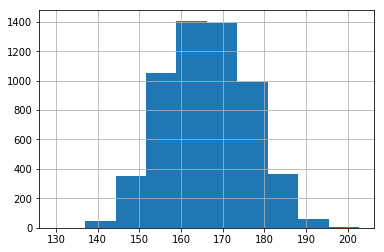

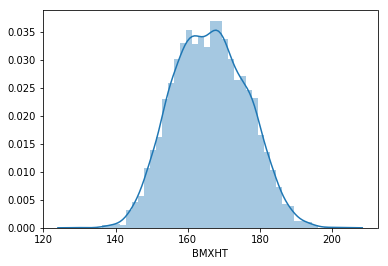

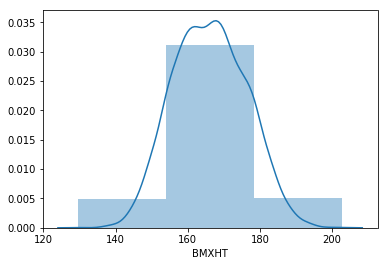

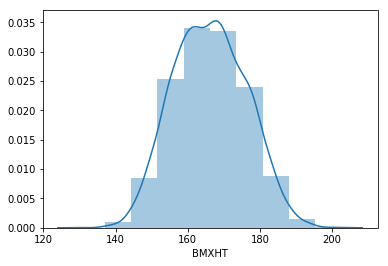

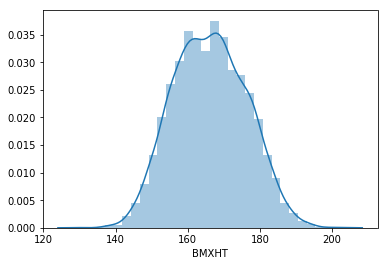

In [7]:
# insert your code here

# histogram plot
da['BMXHT'].hist()
plt.show()

# seaborn histogram plot
sns.distplot(da['BMXHT'].dropna())
plt.show()

# seaborn histogram plot 3 bins
sns.distplot(da['BMXHT'].dropna(), bins=3)
plt.show()

# seaborn histogram plot 10 bins
sns.distplot(da['BMXHT'].dropna(), bins=10)
plt.show()

# seaborn histogram plot 30 bins
sns.distplot(da['BMXHT'].dropna(), bins=30)
plt.show()

__Q3a.__ Use the `bins` argument to [distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html) to produce histograms with different numbers of bins.  Assess whether the default value for this argument gives a meaningful result, and comment on what happens as the number of bins grows excessively large or excessively small. 

__Q3b.__ Make separate histograms for the heights of women and men, then make a side-by-side boxplot showing the heights of women and men.

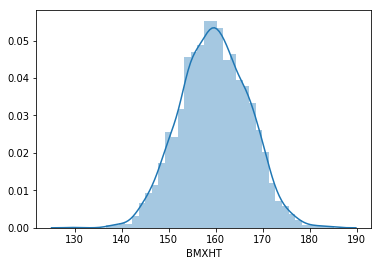

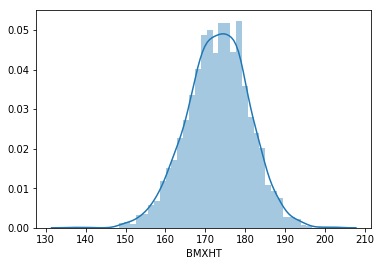

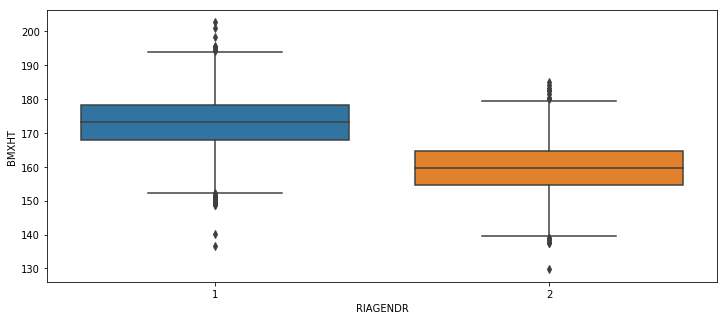

In [8]:
# insert your code here

# women histogram
sns.distplot(da.loc[(da['RIAGENDR'] == 2),'BMXHT'].dropna())
plt.show()

# men histogram
sns.distplot(da.loc[(da['RIAGENDR'] == 1),'BMXHT'].dropna())
plt.show()

# side by side boxplot
plt.figure(figsize=(12, 5))  # Make the figure wider than default (12cm wide by 5cm tall)
sns.boxplot(x="RIAGENDR", y="BMXHT", data=da)  # Make boxplot of BPXSY1 stratified by age group
plt.show()

__Q3c.__ Comment on what features, if any are not represented clearly in the boxplots, and what features, if any, are easier to see in the boxplots than in the histograms.

## Question 4

Make a boxplot showing the distribution of within-subject differences between the first and second systolic blood pressure measurents ([BPXSY1](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BPX_I.htm#BPXSY1) and [BPXSY2](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BPX_I.htm#BPXSY2)).

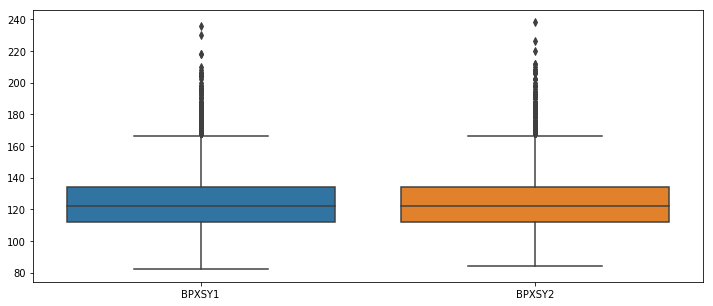

In [9]:
# insert your code here
# wasn't 100% sure what question wanted here

# side by side boxplot
plt.figure(figsize=(12, 5))  # Make the figure wider than default (12cm wide by 5cm tall)
x = da[['BPXSY1','BPXSY2']]
sns.boxplot(data=x)  # Make boxplot of BPXSY1 stratified by age group
plt.show()

__Q4a.__ What proportion of the subjects have a lower SBP on the second reading compared to the first?

In [10]:
# insert your code here

da['LOWER_SBP'] = da['BPXSY2'] < da['BPXSY1']
lower_pct = da[da['LOWER_SBP'] == 1].shape[0] / da.shape[0]
print(lower_pct)

0.42946817785527464


__Q4b.__ Make side-by-side boxplots of the two systolic blood pressure variables.

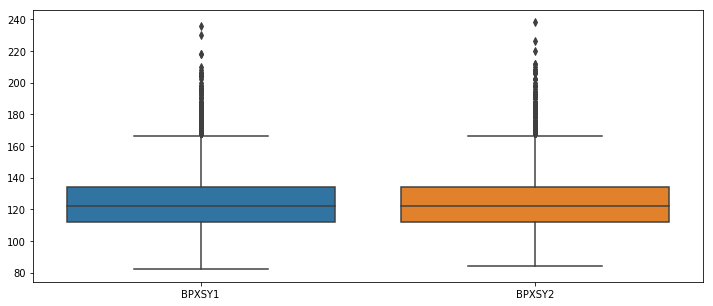

In [11]:
# insert your code here

# side by side boxplot
plt.figure(figsize=(12, 5))  # Make the figure wider than default (12cm wide by 5cm tall)
x = da[['BPXSY1','BPXSY2']]
sns.boxplot(data=x)  # Make boxplot of BPXSY1 stratified by age group
plt.show()

__Q4c.__ Comment on the variation within either the first or second systolic blood pressure measurements, and the variation in the within-subject differences between the first and second systolic blood pressure measurements.

## Question 5

Construct a frequency table of household sizes for people within each educational attainment category (the relevant variable is [DMDEDUC2](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#DMDEDUC2)).  Convert the frequencies to proportions.

In [12]:
# insert your code here
da['educational_attainment'] = da['DMDEDUC2'].replace({1:'Less than 9th grade',
                                                      2:'9-11th grade (Includes 12th grade with no diploma)',
                                                      3:'High school graduate/GED or equivalent',
                                                      4:'Some college or AA degree',
                                                      5:'College graduate or above',
                                                      7:'Refused',
                                                      9:'Don\'t Know',
                                                      np.nan:'Missing'})

for level in da['educational_attainment'].unique():
    print('Household Size by Educational Attainment - {education}'.format(education=level))
    print(da.loc[da['educational_attainment'] == level,'DMDHHSIZ'].value_counts(normalize=True))
    print('\n')

Household Size by Educational Attainment - College graduate or above
2    0.347731
3    0.193997
4    0.165447
1    0.142753
5    0.095168
6    0.029283
7    0.025622
Name: DMDHHSIZ, dtype: float64


Household Size by Educational Attainment - High school graduate/GED or equivalent
2    0.270658
3    0.171164
4    0.161889
1    0.152614
5    0.109612
7    0.068297
6    0.065767
Name: DMDHHSIZ, dtype: float64


Household Size by Educational Attainment - Some college or AA degree
2    0.268970
3    0.193091
4    0.169031
1    0.151141
5    0.122147
6    0.050586
7    0.045034
Name: DMDHHSIZ, dtype: float64


Household Size by Educational Attainment - 9-11th grade (Includes 12th grade with no diploma)
2    0.222395
3    0.163297
4    0.152411
5    0.146190
1    0.116641
6    0.113530
7    0.085537
Name: DMDHHSIZ, dtype: float64


Household Size by Educational Attainment - Missing
4    0.226054
3    0.210728
5    0.187739
7    0.149425
6    0.134100
2    0.084291
1    0.007663
Name: DMDHHSI

__Q5a.__ Comment on any major differences among the distributions.

__Q5b.__ Restrict the sample to people between 30 and 40 years of age.  Then calculate the median household size for women and men within each level of educational attainment.

In [13]:
# insert your code here
for level in da['educational_attainment'].unique():
    for value in [1,2]:
        if value == 1:
            print('Average Household Size by Educational Attainment - Men : {education}'.format(gender=value, education=level))
            print(da.loc[(da['RIDAGEYR'] >= 30) & (da['RIDAGEYR'] <= 40) & (da['RIAGENDR'] == value),'DMDHHSIZ'].mean())
            print('\n')
        else:
            print('Average Household Size by Educational Attainment - Women : {education}'.format(gender=value, education=level))
            print(da.loc[(da['RIDAGEYR'] >= 30) & (da['RIDAGEYR'] <= 40) & (da['RIAGENDR'] == value),'DMDHHSIZ'].mean())
            print('\n')

Average Household Size by Educational Attainment - Men : College graduate or above
3.925101214574899


Average Household Size by Educational Attainment - Women : College graduate or above
4.148496240601504


Average Household Size by Educational Attainment - Men : High school graduate/GED or equivalent
3.925101214574899


Average Household Size by Educational Attainment - Women : High school graduate/GED or equivalent
4.148496240601504


Average Household Size by Educational Attainment - Men : Some college or AA degree
3.925101214574899


Average Household Size by Educational Attainment - Women : Some college or AA degree
4.148496240601504


Average Household Size by Educational Attainment - Men : 9-11th grade (Includes 12th grade with no diploma)
3.925101214574899


Average Household Size by Educational Attainment - Women : 9-11th grade (Includes 12th grade with no diploma)
4.148496240601504


Average Household Size by Educational Attainment - Men : Missing
3.925101214574899


Average

## Question 6

The participants can be clustered into "maked variance units" (MVU) based on every combination of the variables [SDMVSTRA](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#SDMVSTRA) and [SDMVPSU](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#SDMVPSU).  Calculate the mean age ([RIDAGEYR](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#RIDAGEYR)), height ([BMXHT](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BMX_I.htm#BMXHT)), and BMI ([BMXBMI](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BMX_I.htm#BMXBMI)) for each gender ([RIAGENDR](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#RIAGENDR)), within each MVU, and report the ratio between the largest and smallest mean (e.g. for height) across the MVUs.

In [14]:
# insert your code here

MVUs = []
for value in da['SDMVSTRA'].unique():
    for val in da['SDMVPSU'].unique():
        MVUs.append([value, val])

joined_mvus = []
genders = []
mean_ages = []
mean_heights = []
mean_bmis = []
for mvu in MVUs:
    for gender in da['RIAGENDR'].unique():
        joined_mvu = str(mvu[0]) + " : " + str(mvu[1])
        mean_age = da.loc[(da['SDMVSTRA'] == mvu[0]) & (da['SDMVPSU'] == mvu[1]) & (da['RIAGENDR'] == gender), 'RIDAGEYR'].mean()
        mean_height = da.loc[(da['SDMVSTRA'] == mvu[0]) & (da['SDMVPSU'] == mvu[1]) & (da['RIAGENDR'] == gender), 'BMXHT'].mean()
        mean_bmi = da.loc[(da['SDMVSTRA'] == mvu[0]) & (da['SDMVPSU'] == mvu[1]) & (da['RIAGENDR'] == gender), 'BMXBMI'].mean()
        joined_mvus.append(joined_mvu)
        mean_ages.append(mean_age)
        mean_heights.append(mean_height)
        mean_bmis.append(mean_bmi)
        genders.append(gender)
        
stats = pd.concat([pd.Series(joined_mvus), pd.Series(genders), pd.Series(mean_ages), pd.Series(mean_heights), pd.Series(mean_bmis)], axis=1).rename(columns={0:'MVU',1:'Gender', 2:'Mean Age', 3:'Mean Height', 4:'Mean BMI'})
stats

,MVU,Gender,Mean Age,Mean Height,Mean BMI
0,125 : 1,1,55.165289,173.631092,29.727731
1,125 : 1,2,50.900901,160.762385,30.385321
2,125 : 2,1,49.705882,174.456863,29.143564
3,125 : 2,2,51.660000,160.021429,28.564286
4,131 : 1,1,53.140187,175.610476,28.259615
5,131 : 1,2,54.893617,161.989362,30.061702
6,131 : 2,1,46.778846,175.091346,30.077885
7,131 : 2,2,45.000000,161.673810,32.984127
8,126 : 1,1,48.416667,175.149398,29.033333
9,126 : 1,2,46.229167,160.387500,31.262500


__Q6a.__ Comment on the extent to which mean age, height, and BMI vary among the MVUs.

In [15]:
stats.describe()

,Gender,Mean Age,Mean Height,Mean BMI
count,60.000000,60.000000,60.000000,60.000000
mean,1.500000,47.916477,166.434092,29.234183
std,0.504219,3.765465,7.003810,1.665865
min,1.000000,42.063158,155.402041,25.744444
25%,1.000000,44.794106,160.050790,27.964815
50%,1.500000,47.411565,166.089261,29.187543
75%,2.000000,50.850225,173.091081,30.424147
max,2.000000,55.638462,176.974157,32.984127


__Q6b.__ Calculate the inter-quartile range (IQR) for age, height, and BMI for each gender and each MVU.  Report the ratio between the largest and smalles IQR across the MVUs.

In [19]:
# insert your code here
iqr_ages = []
iqr_heights = []
iqr_bmis = []
for mvu in MVUs:
    for gender in da['RIAGENDR'].unique():
        joined_mvu = str(mvu[0]) + " : " + str(mvu[1])
        age = da.loc[(da['SDMVSTRA'] == mvu[0]) & (da['SDMVPSU'] == mvu[1]) & (da['RIAGENDR'] == gender), 'RIDAGEYR'].dropna()
        height = da.loc[(da['SDMVSTRA'] == mvu[0]) & (da['SDMVPSU'] == mvu[1]) & (da['RIAGENDR'] == gender), 'BMXHT'].dropna()
        bmi = da.loc[(da['SDMVSTRA'] == mvu[0]) & (da['SDMVPSU'] == mvu[1]) & (da['RIAGENDR'] == gender), 'BMXBMI'].dropna()
        
        iqr_age = np.percentile(age, q=75) - np.percentile(age, q=25)
        iqr_height = np.percentile(height, q=75) - np.percentile(height, q=25)
        iqr_bmi = np.percentile(bmi, q=75) - np.percentile(bmi, q=25)
        
        iqr_ages.append(iqr_age)
        iqr_heights.append(iqr_height)
        iqr_bmis.append(iqr_bmi)
        
iqr_stats = pd.concat([pd.Series(joined_mvus), pd.Series(genders), pd.Series(iqr_ages), pd.Series(iqr_heights), pd.Series(iqr_bmis)], axis=1).rename(columns={0:'MVU',1:'Gender', 2:'IQR Age', 3:'IQR Height', 4:'IQR BMI'})
iqr_stats

,MVU,Gender,IQR Age,IQR Height,IQR BMI
0,125 : 1,1,29.00,10.350,8.300
1,125 : 1,2,31.00,9.100,8.000
2,125 : 2,1,33.50,7.925,7.900
3,125 : 2,2,32.25,10.675,10.325
4,131 : 1,1,36.00,10.500,7.525
5,131 : 1,2,35.75,10.025,11.075
6,131 : 2,1,28.00,7.750,7.850
7,131 : 2,2,24.00,7.575,10.625
8,126 : 1,1,36.25,10.450,8.000
9,126 : 1,2,30.25,8.500,10.675


__Q6c.__ Comment on the extent to which the IQR for age, height, and BMI vary among the MVUs.